In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedShuffleSplit
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support,classification_report, confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [24]:
class_names = ['suspicious','non suspicious']

In [93]:
#These are the functions I will use for result visualisation
def plot_confusion_matrix(y_test,y_predicted,labels):
    cm = confusion_matrix(y_test, y_predicted,labels =labels)

    figsize = (10,7)
    df_cm = pd.DataFrame(
        cm, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return

def evaluate_classifier(pipeline, x_test, y_test):

    y_predicted = pipeline.predict(x_test)

    report  = classification_report(y_test,y_predicted)
    print(report)
    plot_confusion_matrix(y_test, y_predicted, class_names)
    return

In [46]:
data = pd.read_csv('./data/train.csv',index_col='customer',encoding='utf8')

In [95]:
data_test = pd.read_csv('./data/test.csv',index_col='customer',encoding='utf8')

In [96]:
data_test.head()

,category,turnover,transaction_count,io_ratio,age,nationality,is_pep,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,atm_deposit
customer,,,,,,,,,,,,,,
91000000,0,1235859.85,1.0,0.00,64.0,33,0,106.42,107.0,2,1.0,0.046108,1235859.85,12549.438865
91000001,1,53087.97,3.0,0.00,0.0,172,0,69.28,139.0,1,1.0,0.414826,53087.97,116.106050
91000002,0,22003.25,4.0,0.25,41.0,33,0,30.94,62.0,2,1.0,0.030105,1066.98,106.434228
91000003,0,72947.07,4.0,0.50,16.0,94,0,24.19,97.0,2,1.0,0.025249,16701.34,106.455505
91000004,0,9964.06,1.0,0.00,46.0,50,0,47.84,48.0,2,1.0,0.083395,9964.06,118.541699


In [47]:
data.head()

,category,suspicious,turnover,transaction_count,io_ratio,age,nationality,is_pep,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,atm_deposit
customer,,,,,,,,,,,,,,,
90000000,0,0,734958.58,7.0,0.142857,79.0,134,0,24.63,124.0,3,6.0,0.128703,215959.85,832.364854
90000001,1,0,1009400.35,2.0,0.500000,0.0,33,0,78.49,79.0,3,1.0,0.635584,53.97,34.752298
90000002,0,0,11051.68,3.0,0.666667,77.0,191,0,35.74,72.0,2,1.0,0.138152,1632.91,17.323031
90000003,0,0,31193.29,81.0,0.308642,77.0,50,0,2.05,95.0,2,2.0,0.333904,3203.10,50.945281
90000004,0,0,205489.77,1.0,1.000000,39.0,172,0,147.53,148.0,4,1.0,0.341578,5626.65,0.000000


In [48]:
cols_to_transform = ['nationality', 'is_pep','category']
data = pd.get_dummies(data=data, columns = cols_to_transform)
data['suspicious'] = data['suspicious'].map({ 1 : 'suspicious', 0: 'non suspicious'})

In [97]:
cols_to_transform = ['nationality', 'is_pep','category']
data_test = pd.get_dummies(data=data_test, columns = cols_to_transform)

In [100]:
x.head()

,turnover,transaction_count,io_ratio,age,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,...,nationality_134,nationality_141,nationality_172,nationality_176,nationality_191,is_pep_0,is_pep_1,category_0,category_1,category_2
customer,,,,,,,,,,,,,,,,,,,,,
90000000,734958.58,7.0,0.142857,79.0,24.63,124.0,3,6.0,0.128703,215959.85,...,1,0,0,0,0,1,0,1,0,0
90000001,1009400.35,2.0,0.500000,0.0,78.49,79.0,3,1.0,0.635584,53.97,...,0,0,0,0,0,1,0,0,1,0
90000002,11051.68,3.0,0.666667,77.0,35.74,72.0,2,1.0,0.138152,1632.91,...,0,0,0,0,1,1,0,1,0,0
90000003,31193.29,81.0,0.308642,77.0,2.05,95.0,2,2.0,0.333904,3203.10,...,0,0,0,0,0,1,0,1,0,0
90000004,205489.77,1.0,1.000000,39.0,147.53,148.0,4,1.0,0.341578,5626.65,...,0,0,1,0,0,1,0,1,0,0


In [101]:
data_test['nationality_117'] = 0

See label frequencies

In [49]:
label_frequencies = []
label_frequencies.append(data.suspicious.tolist().count('suspicious')/len(data))
label_frequencies.append(data.suspicious.tolist().count('non suspicious')/len(data))

In [50]:
label_frequencies

[0.009087, 0.990913]

See nans

In [30]:
# Compute the number of missing observations for each feature
nb_null = data.apply(lambda x: x.isnull().sum(), axis=0).nlargest(20)

# Compute the percentage of missing values for each feature
pct_null = nb_null/len(data)

# Create a new DataFrame to display the results
d = {'Nb of null obs':nb_null, 'Percentage': pct_null}
df = pd.DataFrame(d)

print(df)

                         Nb of null obs  Percentage
category                              0         0.0
suspicious                            0         0.0
turnover                              0         0.0
transaction_count                     0         0.0
io_ratio                              0         0.0
age                                   0         0.0
nationality                           0         0.0
is_pep                                0         0.0
inactive_days_average                 0         0.0
inactive_days_max                     0         0.0
n_of_accounts                         0         0.0
distinct_counterparties               0         0.0
channel_risk                          0         0.0
atm_withdrawal                        0         0.0
atm_deposit                           0         0.0


In [3]:
data.head()

,category,suspicious,turnover,transaction_count,io_ratio,age,nationality,is_pep,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,atm_deposit
customer,,,,,,,,,,,,,,,
90000000,0,0,734958.58,7.0,0.142857,79.0,134,0,24.63,124.0,3,6.0,0.128703,215959.85,832.364854
90000001,1,0,1009400.35,2.0,0.500000,0.0,33,0,78.49,79.0,3,1.0,0.635584,53.97,34.752298
90000002,0,0,11051.68,3.0,0.666667,77.0,191,0,35.74,72.0,2,1.0,0.138152,1632.91,17.323031
90000003,0,0,31193.29,81.0,0.308642,77.0,50,0,2.05,95.0,2,2.0,0.333904,3203.10,50.945281
90000004,0,0,205489.77,1.0,1.000000,39.0,172,0,147.53,148.0,4,1.0,0.341578,5626.65,0.000000


In [51]:
y = data.suspicious
x = data.drop('suspicious',axis=1)

In [52]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state= 1)

In [53]:
train_x.head()

,turnover,transaction_count,io_ratio,age,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,...,nationality_134,nationality_141,nationality_172,nationality_176,nationality_191,is_pep_0,is_pep_1,category_0,category_1,category_2
customer,,,,,,,,,,,,,,,,,,,,,
90771718,409868.95,3.0,0.666667,60.0,30.46,92.0,1,1.0,0.410764,49313.47,...,0,0,1,0,0,1,0,1,0,0
90521462,143538.46,3.0,0.000000,26.0,94.21,189.0,1,1.0,0.184895,0.00,...,0,0,1,0,0,1,0,1,0,0
90137361,770447.14,26.0,0.269231,48.0,6.11,98.0,1,1.0,0.130168,4727.42,...,0,0,0,0,0,1,0,1,0,0
90404985,2407.86,4.0,0.250000,18.0,49.89,150.0,1,1.0,0.216123,683.03,...,0,0,0,0,0,1,0,1,0,0
90910092,1093644.44,18.0,0.555556,0.0,7.87,79.0,5,1.0,0.607511,117031.88,...,0,0,1,0,0,1,0,0,1,0


In [39]:
pipeline = Pipeline([
    ('classifier',          LogisticRegression(class_weight='balanced',n_jobs=-1))
])

In [40]:
pipeline.fit(train_x,train_y)

C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Raphael\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1296: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Pipeline(memory=None,
     steps=[('classifier', LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False))])

In [43]:
evaluate_classifier(pipeline, test_x,test_y)

              precision    recall  f1-score   support

           0       0.99      0.45      0.62    198157
           1       0.01      0.62      0.02      1843

   micro avg       0.46      0.46      0.46    200000
   macro avg       0.50      0.54      0.32    200000
weighted avg       0.98      0.46      0.62    200000



In [85]:
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.2, random_state=0)

In [86]:
x.head()

,turnover,transaction_count,io_ratio,age,inactive_days_average,inactive_days_max,n_of_accounts,distinct_counterparties,channel_risk,atm_withdrawal,...,nationality_134,nationality_141,nationality_172,nationality_176,nationality_191,is_pep_0,is_pep_1,category_0,category_1,category_2
customer,,,,,,,,,,,,,,,,,,,,,
90000000,734958.58,7.0,0.142857,79.0,24.63,124.0,3,6.0,0.128703,215959.85,...,1,0,0,0,0,1,0,1,0,0
90000001,1009400.35,2.0,0.500000,0.0,78.49,79.0,3,1.0,0.635584,53.97,...,0,0,0,0,0,1,0,0,1,0
90000002,11051.68,3.0,0.666667,77.0,35.74,72.0,2,1.0,0.138152,1632.91,...,0,0,0,0,1,1,0,1,0,0
90000003,31193.29,81.0,0.308642,77.0,2.05,95.0,2,2.0,0.333904,3203.10,...,0,0,0,0,0,1,0,1,0,0
90000004,205489.77,1.0,1.000000,39.0,147.53,148.0,4,1.0,0.341578,5626.65,...,0,0,1,0,0,1,0,1,0,0


In [87]:
x_res_index = x.reset_index()
y_res_index = y.reset_index()
for a, b in sss.split(x_res_index,y_res_index):
    print(y_res_index[a].suspicious.tolist().count('suspicious'))
    print(y_res_index[a].suspicious.tolist().count('non suspicious'))

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [65]:
pipeline_logisticcv = Pipeline([
    ('classifier',          LogisticRegressionCV(Cs=9,class_weight='balanced',cv=sss))
])

In [66]:
pipeline_logisticcv.fit(train_x,train_y)

Pipeline(memory=None,
     steps=[('classifier', LogisticRegressionCV(Cs=9, class_weight='balanced',
           cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None),
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0))])

In [67]:
evaluate_classifier(pipeline_logisticcv, test_x,test_y)

                precision    recall  f1-score   support

non suspicious       0.99      0.03      0.05    198157
    suspicious       0.01      0.98      0.02      1843

     micro avg       0.04      0.04      0.04    200000
     macro avg       0.50      0.50      0.04    200000
  weighted avg       0.98      0.04      0.05    200000



In [90]:
pipeline_gboosting = Pipeline([
    ('classifier',          GradientBoostingClassifier())
])

In [91]:
pipeline_gboosting.fit(train_x,train_y)

Pipeline(memory=None,
     steps=[('classifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))])

                precision    recall  f1-score   support

non suspicious       0.99      1.00      1.00    198157
    suspicious       0.61      0.05      0.09      1843

     micro avg       0.99      0.99      0.99    200000
     macro avg       0.80      0.52      0.54    200000
  weighted avg       0.99      0.99      0.99    200000



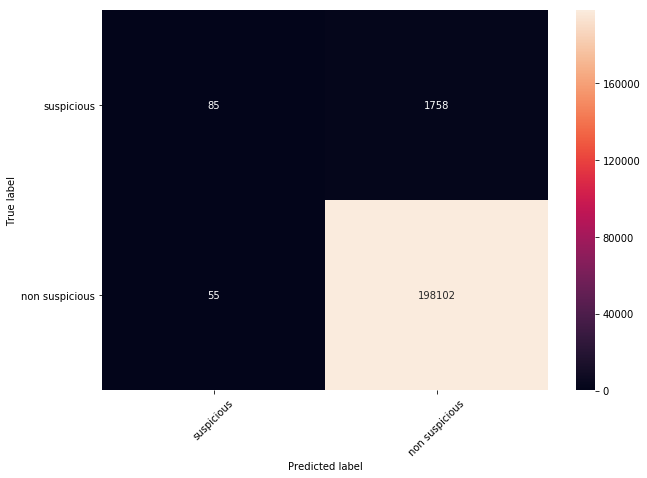

In [94]:
evaluate_classifier(pipeline_gboosting, test_x,test_y)

In [109]:
predicted_labels = pipeline_gboosting.predict_proba(data_test)

In [112]:
data_set_with_label = data_test.copy(deep=True)

In [114]:
data_set_with_label['label'] = predicted_labels[:,1]

In [117]:
data_set_with_label = data_set_with_label.sort_values(by='label',ascending=False)

In [119]:
aaa = data_set_with_label.head(200)

In [125]:
aaa.index.to_frame().to_csv("res.csv",index=False)

In [108]:
len(predicted_labels)

1000000

In [107]:
len(predicted_labels[predicted_labels == 'suspicious'])

23627

In [128]:
parameters = {
    'loss': ('deviance', 'exponential'),
    'n_estimators' : (100,200),
    'max_depth':(3,4,5)
}

In [129]:
grid_search = GridSearchCV(pipeline_gboosting, parameters, cv=5, n_jobs=-1, verbose=1)

In [131]:
pipeline_gboosting.get_params()

{'memory': None,
 'steps': [('classifier',
   GradientBoostingClassifier(criterion='friedman_mse', init=None,
                 learning_rate=0.1, loss='deviance', max_depth=3,
                 max_features=None, max_leaf_nodes=None,
                 min_impurity_decrease=0.0, min_impurity_split=None,
                 min_samples_leaf=1, min_samples_split=2,
                 min_weight_fraction_leaf=0.0, n_estimators=100,
                 n_iter_no_change=None, presort='auto', random_state=None,
                 subsample=1.0, tol=0.0001, validation_fraction=0.1,
                 verbose=0, warm_start=False))],
 'classifier': GradientBoostingClassifier(criterion='friedman_mse', init=None,
               learning_rate=0.1, loss='deviance', max_depth=3,
               max_features=None, max_leaf_nodes=None,
               min_impurity_decrease=0.0, min_impurity_split=None,
               min_samples_leaf=1, min_samples_split=2,
               min_weight_fraction_leaf=0.0, n_estimators=100

In [130]:
grid_search.fit(train_x, train_y)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


ValueError: Invalid parameter learning_rate for estimator Pipeline(memory=None,
     steps=[('classifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=...    subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))]). Check the list of available parameters with `estimator.get_params().keys()`.